<a href="https://colab.research.google.com/github/iatra/COSC2673-Assignment2-Group9/blob/main/s4005248_s3980067.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning COSC2673-Assignment2-Group9
Author : Joelle Lee Ming Yin (s3980067) & Isabella Tranquilino (s4005248)

## Approach

### Load Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

zip_path = '/content/drive/MyDrive/ML A2 Dataset/Image_classification_data.zip'

import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/data')

import os

# List first few files/folders in the extraction folder
extracted_path = '/content/data'
for root, dirs, files in os.walk(extracted_path):
    print(f"Directory: {root}")
    for file in files[:5]:  # Show up to 5 files per directory
        print(f"  - {file}")
    break  # Remove this if you want to see all subfolders


Mounted at /content/drive
Directory: /content/data
  - data_labels_mainData.csv
  - data_labels_extraData.csv


In [3]:
import pandas as pd

df_main = pd.read_csv('/content/data/data_labels_mainData.csv')
df_extra = pd.read_csv('/content/data/data_labels_extraData.csv')

df_main.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0


### Class Imbalance Identification

In [8]:
#--------- Check class imbalance in cellTypeName -------------
class_counts_named = df_main['cellTypeName'].value_counts()
print("Class distribution (by name):")
print(class_counts_named)

# Calculate percentage of each unique cell type
data = {'cellTypeName': ['epithelial'] * 4079 + ['inflammatory'] * 2543 + ['fibroblast'] * 1888 + ['others'] * 1386}
df_temp = pd.DataFrame(data)

class_percentages_named = df_temp['cellTypeName'].value_counts(normalize=True) * 100
print("Class distribution (by percentage):")
print(class_percentages_named.round(2))

Class distribution (by name):
cellTypeName
epithelial      4079
inflammatory    2543
fibroblast      1888
others          1386
Name: count, dtype: int64
Class distribution (by percentage):
cellTypeName
epithelial      41.22
inflammatory    25.70
fibroblast      19.08
others          14.01
Name: proportion, dtype: float64


Based on the numbers and percentages, we can identify a class imbalance present in the CellTypeName distribution.

In [13]:
#--------- Check class imbalance in isCancerous -------------
print("Main Data - isCancerous distribution:")
print(df_main['isCancerous'].value_counts())

# Calculate percentage of isCancerous
main_data = {'isCancerous': [0] * 5817 + [1] * 4079}
df_main_temp = pd.DataFrame(main_data)

main_percentages = df_main_temp['isCancerous'].value_counts(normalize=True) * 100
print("Main Data - isCancerous distribution (by percentage):")
print(main_percentages.round(2))

#--------- Check class imbalance in isCancerous - extra Data -------------
print("Extra Data - isCancerous distribution:")
print(df_extra['isCancerous'].value_counts())

# Calculate percentage of isCancerous - extra Data
class_percentages_extra = df_extra['isCancerous'].value_counts(normalize=True) * 100
print("\nExtra Data - isCancerous distribution (by percentage):")
print(class_percentages_extra.round(2))

Main Data - isCancerous distribution:
isCancerous
0    5817
1    4079
Name: count, dtype: int64
Main Data - isCancerous distribution (by percentage):
isCancerous
0    58.78
1    41.22
Name: proportion, dtype: float64
Extra Data - isCancerous distribution:
isCancerous
0    7394
1    2990
Name: count, dtype: int64

Extra Data - isCancerous distribution (by percentage):
isCancerous
0    71.21
1    28.79
Name: proportion, dtype: float64


Not a drastic change in class imbalance for the main data but for the extra data shows a more significant class imbalance, the non-cancerous class has a larger representation than the cancerous class.

In [12]:
#--------- Check class imbalance in cellType -------------
class_counts = df_main['cellType'].value_counts().sort_index()
print("Class distribution (by numeric label):")
print(class_counts)

# Calculate percentage of cellType
data_numeric = {'cellType': [0] * 1888 + [1] * 2543 + [2] * 4079 + [3] * 1386}
df_numeric = pd.DataFrame(data_numeric)

class_percentages_numeric = df_numeric['cellType'].value_counts(normalize=True) * 100
print("Class distribution (by percentage):")
print(class_percentages_numeric.round(2).sort_index())

Class distribution (by numeric label):
cellType
0    1888
1    2543
2    4079
3    1386
Name: count, dtype: int64
Class distribution (by percentage):
cellType
0    19.08
1    25.70
2    41.22
3    14.01
Name: proportion, dtype: float64


There's a noticeable class imbalance in the cellType distribution. Class 2 is almost 3 times larger than the Class 3.

### Exploratory Data Analysis (EDA)
Some cells of code in this section have been retrieved from the Week 6 Lab and have been adapted to fit this task.

In [ ]:
#--------- Initial exploration into dataframe -------------
df_main.info()
df_main.describe()

#checking for missing vals
df_main.isnull().sum() #no missing labels in any cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9896 entries, 0 to 9895
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   InstanceID    9896 non-null   int64 
 1   patientID     9896 non-null   int64 
 2   ImageName     9896 non-null   object
 3   cellTypeName  9896 non-null   object
 4   cellType      9896 non-null   int64 
 5   isCancerous   9896 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 464.0+ KB


,0
InstanceID,0
patientID,0
ImageName,0
cellTypeName,0
cellType,0
isCancerous,0


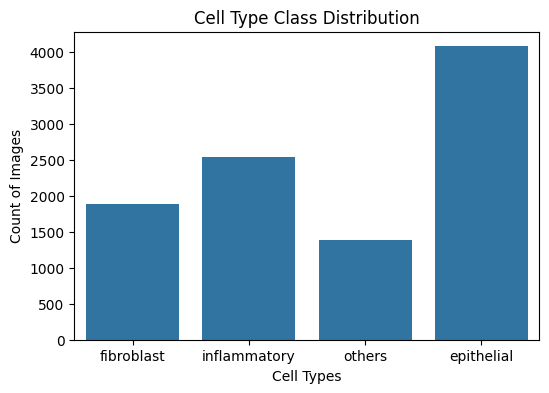

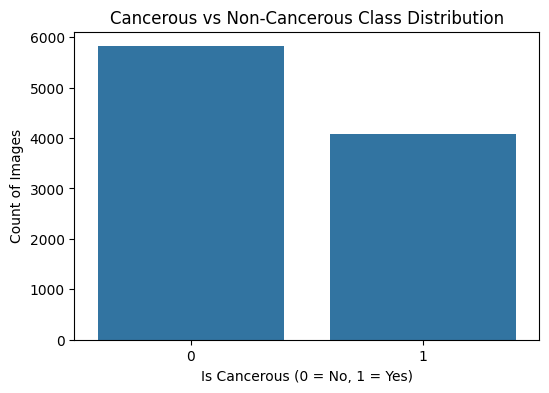

In [ ]:
#-------- Target variables class distributions ----------
df_main['cellTypeName'].value_counts()
df_main['isCancerous'].value_counts()

#plotting distributions
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df_main, x='cellTypeName')
plt.xlabel('Cell Types')
plt.ylabel('Count of Images')
plt.title('Cell Type Class Distribution')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df_main, x='isCancerous')
plt.xlabel('Is Cancerous (0 = No, 1 = Yes)')
plt.ylabel('Count of Images')
plt.title('Cancerous vs Non-Cancerous Class Distribution')
plt.show()

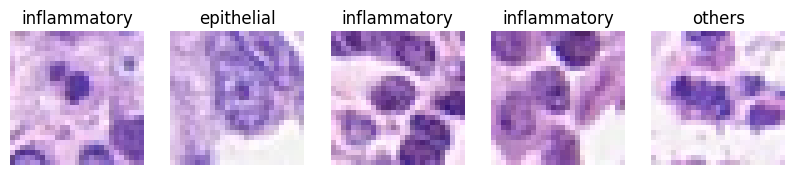

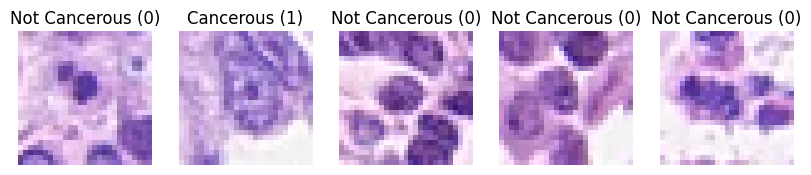

In [ ]:
# ------------- Displaying sample images --------------
import os
from PIL import Image

image_dir = '/content/data/patch_images/'

#grabbing 5 sample images
sample_images = df_main.sample(5)

#displaying sample images
f, axarr = plt.subplots(1, 5, figsize=(10, 5))
for i, (_, row) in enumerate(sample_images.iterrows()):
    img_path = os.path.join(image_dir, row['ImageName']) #accessing images from patch_images folder/dir
    img = Image.open(img_path)
    axarr[i].imshow(img)
    axarr[i].axis('off')
    axarr[i].set_title(row['cellTypeName'])  #display cell type names
plt.show()

f, axarr = plt.subplots(1, 5, figsize=(10, 5))
for i, (_, row) in enumerate(sample_images.iterrows()):
    img_path = os.path.join(image_dir, row['ImageName']) #accessing images from patch_images folder/dir
    img = Image.open(img_path)
    axarr[i].imshow(img)
    axarr[i].axis('off')
    cancer_identification = "Cancerous (1)" if row['isCancerous'] == 1 else "Not Cancerous (0)" #renaming label 1 or 0 to Cancerous or Not Cancerous
    axarr[i].set_title(cancer_identification)  #display isCancerous or Not
plt.show()


In [ ]:
#----------- Checking image sizes --------------
image_sizes = []

#checking through each image
for img_name in df_main['ImageName']:
    img_path = os.path.join(image_dir, img_name)
    try:
        with Image.open(img_path) as img:
            image_sizes.append(img.size)  #size of each image to list
    except:
        continue

print("Image sizes:")
for size in sorted(set(image_sizes)):
    print(size)

Image sizes:
(27, 27)


### Pre-processing of Data

### Task 1: Classifying Cancerous Cell or Not
**Author: Isabella**

#### Model Building (Baseline)

#### Model Training (Parameter Tuning)

#### Evaluation

### Task 2: Classifying Cell Type
**Author: Joelle**

#### Model Building (Baseline)

#### Model Training (Parameter Tuning)

#### Evaluation

## Ultimate Judgement

## Conclusion